# Final Project

Fajri Sofianto

Data : Titanic

Membuat Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image  
from six import StringIO

In [2]:
df_train = pd.read_csv('/Users/fajrisofianto/Downloads/titanic/train.csv') #import data training
df_test_fitur = pd.read_csv('/Users/fajrisofianto/Downloads/titanic/test.csv') #import data testing
df_test_target = pd.read_csv('/Users/fajrisofianto/Downloads/titanic/gender_submission.csv') #import data target

display(df_train.info())
display(df_test_fitur.info())
display(df_test_target.info())

def visualCM(x, y, total_label=2, title=""):
  cm = confusion_matrix(x, y)
  fig, ax = plt.subplots(figsize=(total_label, total_label))
  ax.imshow(cm)
  ax.grid(False)
  ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
  ticks = range(0, total_label)
  ax.xaxis.set(ticks=ticks, ticklabels=ticks)
  ax.yaxis.set(ticks=ticks, ticklabels=ticks)
  ax.set_ylim(total_label-0.5, -0.5)
  for i in range(total_label):
      for j in range(total_label):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
  plt.title(title)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


None

# Cleaning data testing Fitur

In [30]:
df_test_fitur.isnull().sum()
df_test_fitur['Age'] = df_test_fitur['Age'].fillna(0)
df_test_fitur['Fare'] = df_test_fitur['Fare'].fillna(0)
df_test_fitur = df_test_fitur[['PassengerId', 'Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']].fillna(0)

df_test_fitur.info()

df_test_target = df_test_target['Survived']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


KeyError: 'Survived'

# Cleaning data training

In [5]:
df_train = df_train[['PassengerId', 'Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked', 'Survived']]

df_train.isna().sum()

df_train.loc[:,"Age"] = df_train["Age"].fillna(0)

df_train = df_train.dropna()

df_train_fitur = df_train[['PassengerId', 'Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]

df_train_fitur.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Sex          889 non-null    object 
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [18]:
df_train_target = df_train['Survived'] #define data training target survived or not
df_train_target.info()
df_train_target

<class 'pandas.core.series.Series'>
Int64Index: 889 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
889 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Encode data training

In [21]:
train_fitur = df_train_fitur.copy()

col_to_encode = ['Sex','Embarked']

for c in col_to_encode:
  le = LabelEncoder()
  train_fitur[c] = le.fit_transform(train_fitur[c])
  print(c, le.classes_)

train_fitur


Sex ['female' 'male']
Embarked ['C' 'Q' 'S']


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,2
887,888,1,0,19.0,0,0,30.0000,2
888,889,3,0,0.0,1,2,23.4500,2
889,890,1,1,26.0,0,0,30.0000,0


# Encode data testing

In [22]:
df_test_fitur = df_test_fitur[['PassengerId', 'Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]

test_fitur = df_test_fitur.copy()

col_to_encode = ['Sex','Embarked']

for c in col_to_encode:
  le = LabelEncoder()
  test_fitur[c] = le.fit_transform(test_fitur[c])
  print(c, le.classes_)

test_fitur

Sex ['female' 'male']
Embarked ['C' 'Q' 'S']


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,0.0,0,0,8.0500,2
414,1306,1,0,39.0,0,0,108.9000,0
415,1307,3,1,38.5,0,0,7.2500,2
416,1308,3,1,0.0,0,0,8.0500,2


In [42]:
model_LR = KNeighborsClassifier(n_neighbors=1)

model_LR.fit(train_fitur,df_train_target)

pred_i = model.predict(train_fitur)
error_rate.append(np.mean(pred_i != df_train_target))

In [39]:
y_pred = model_LR.predict(test_fitur)

print(classification_report(df_test_target,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       266
           1       0.49      0.37      0.42       152

    accuracy                           0.63       418
   macro avg       0.59      0.57      0.57       418
weighted avg       0.61      0.63      0.62       418



In [51]:
error_rate = []
jumlah_k = range(1, 100, 1)
for i in jumlah_k:
  # print(i)
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_fitur, df_train_target)

  pred_i = model.predict(train_fitur)
  error_rate.append(np.mean(pred_i != df_train_target))

print(error_rate)

[0.0, 0.20697412823397077, 0.2215973003374578, 0.24859392575928008, 0.2508436445444319, 0.2722159730033746, 0.26996625421822273, 0.2823397075365579, 0.30033745781777277, 0.30708661417322836, 0.30821147356580425, 0.3172103487064117, 0.31496062992125984, 0.31496062992125984, 0.31158605174353204, 0.30708661417322836, 0.3048368953880765, 0.3093363329583802, 0.30708661417322836, 0.312710911136108, 0.3059617547806524, 0.3093363329583802, 0.30708661417322836, 0.3138357705286839, 0.31158605174353204, 0.3138357705286839, 0.3160854893138358, 0.3172103487064117, 0.3138357705286839, 0.3205849268841395, 0.3160854893138358, 0.3228346456692913, 0.31833520809898763, 0.3172103487064117, 0.3160854893138358, 0.3172103487064117, 0.3160854893138358, 0.3228346456692913, 0.3172103487064117, 0.31833520809898763, 0.3194600674915636, 0.3194600674915636, 0.3217097862767154, 0.3205849268841395, 0.3205849268841395, 0.3217097862767154, 0.3228346456692913, 0.3250843644544432, 0.3250843644544432, 0.33183352080989875,

In [52]:
pd.DataFrame({"hasil prediksi":pred_i, "data awal":df_train_target, "prediksi salah":pred_i != df_train_target})

,hasil prediksi,data awal,prediksi salah
0,0,0,False
1,0,1,True
2,0,1,True
3,0,1,True
4,0,0,False
...,...,...,...
886,0,0,False
887,0,1,True
888,0,0,False
889,0,1,True


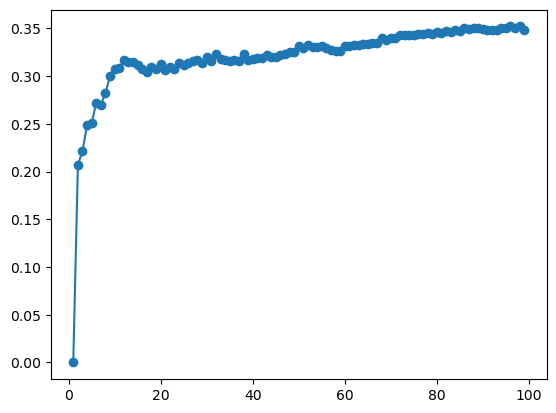

In [53]:
plt.plot(jumlah_k, error_rate, marker="o")

In [71]:
model_LR = KNeighborsClassifier(n_neighbors=20)

model_LR.fit(train_fitur,df_train_target)

KNeighborsClassifier(n_neighbors=20)

In [72]:
y_pred2 = model_LR.predict(test_fitur)

print(classification_report(df_test_target,y_pred2))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       266
           1       0.71      0.07      0.12       152

    accuracy                           0.65       418
   macro avg       0.68      0.53      0.45       418
weighted avg       0.67      0.65      0.54       418

